# THE SPARK FOUNDATION - GRIP MARCH 2024

### TASK 1 : Prediction using Supervised ML

### **Author: Nilesh Ashok Wagh**

**OBJECTIVE**

**Linear Regression with Python Scikit Learn**

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Step-1: Importing all libraries

In [7]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step-2: Reading data from remote link

In [8]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
#checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#to count the number of duplicate rows in a DataFrame
df.duplicated().sum()

0

In [11]:
#to generate descriptive statistics of a DataFrame
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step-3: Data Visualization find any relationship between the data.

<Axes: xlabel='Hours', ylabel='Density'>

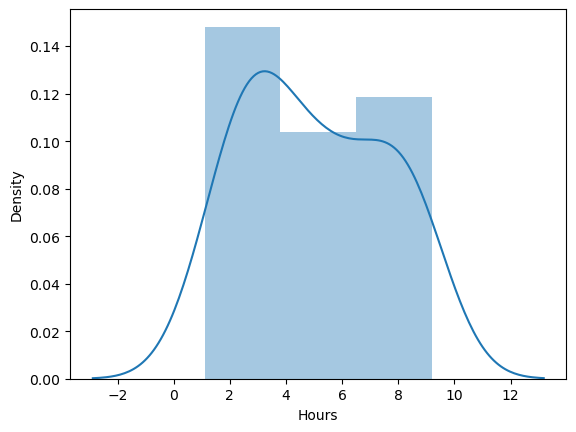

In [12]:
#to visualize the distribution of a univariate set of observations.
sns.distplot(df['Hours'])

<Axes: xlabel='Scores', ylabel='Density'>

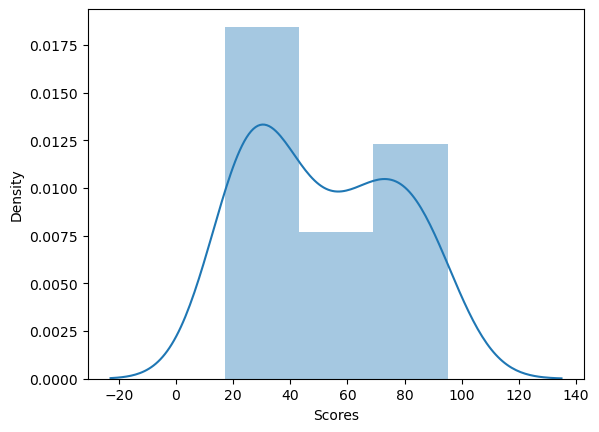

In [13]:
#to visualize the distribution of a univariate set of observations.
sns.distplot(df['Scores'])

There are no null values and hence data cleaning is not required

Let's plot this data that we have on 2-D graph to eyeball our dataset and see if we can manually find any kind of relationship between the two parameters- Hours and Scores.

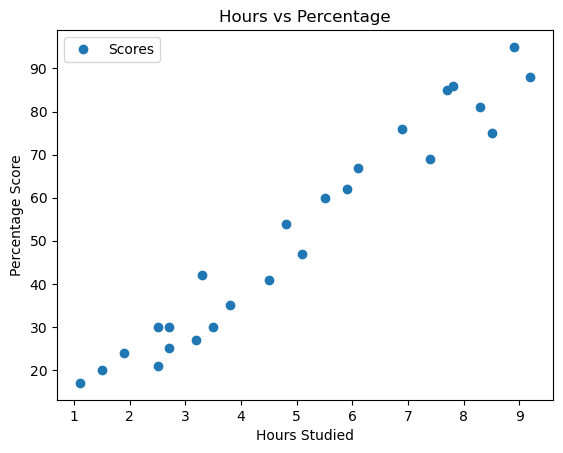

In [14]:
#to create a scatter plot of the 'Scores' column against the 'Hours' column
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Step-4: Preparing Data and splitting into train and test sets

Next is to define our "attributes"(input) variable and "labels"(output)

In [20]:
#This extracts the values of all rows and all columns except the last one from the DataFrame
X = df.iloc[:, :-1].values  #Attribute

#This extracts the values of all rows from the second column of the DataFrame
y = df.iloc[:, 1].values    #Labels

Now that we have the attributes and labels defined, the next step is to split this data into training and test sets.

In [21]:
# Using Scikit-Learn's built-in train_test_split() method:
#to split your data into training and testing sets
from sklearn.model_selection import train_test_split

#Specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
#Provides a seed for the random number generator, ensuring reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We have the training and testing sets ready for training our model.

### Step-5: Training the Algorithm

First I will be making our linear regression algorithm from scratch and then I will compare it with the built-in function sklearn.linear_model.LinearRegression()

Using Scikit-Learn library

In [22]:
#to create and train a linear regression model on your training data

from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()  

regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


<Axes: xlabel='Hours', ylabel='Scores'>

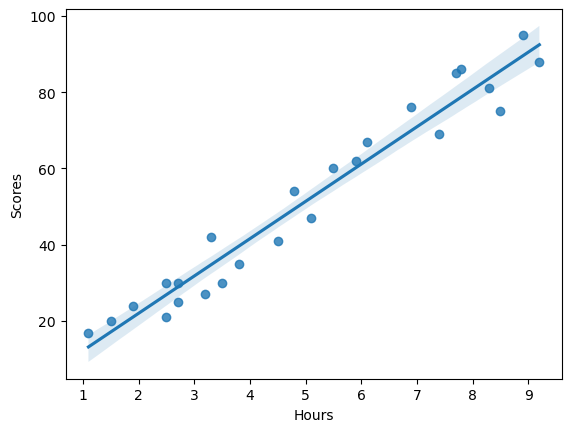

In [23]:
# Plotting the regression line
#to create a scatter plot with a linear regression fit line for the 'Hours' and 'Scores' columns in your DataFrame
sns.regplot(x='Hours',y='Scores',data=df)

### Step-6: Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [24]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
dataf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataf

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Step-7: Accurracy of the Model

In [26]:
# You can also test with your own data
#creates a 2D array containing a single value (9.25 hours)
hours = [[9.25]]

#trained linear regression model to predict the score for the given number of hours.
own_pred = regressor.predict(hours)

print("No of Hours = {}".format(hours[0][0]))  #Prints the input hours.

print("Predicted Score = {}".format(own_pred[0]))  #Prints the predicted score.

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Step-8: Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [27]:
#evaluating the performance of linear regression model using various metrics
from sklearn import metrics  

#Computes the mean absolute error between the actual (y_test) and predicted (y_pred) values.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

#Computes the mean squared error between the actual and predicted values.
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

#Computes the root mean squared error by taking the square root of the mean squared error.
print('Root Mean Squared Erro:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#Computes the R-squared value, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.
print('R-squard Error:\n',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Erro: 4.6474476121003665
R-squard Error:
 0.9454906892105356


Here,we can conclude the accuracy of our model is 94.54% and the Predicted score for 9.25 hrs/day is 93.69

THANK YOU